In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import matplotlib.pyplot as plt
from src.clean_data import load_clean_data




ModuleNotFoundError: No module named 'src.clean_data'

# Load and clean movies data


In [ ]:
df_movies = load_clean_data("../raw/movies.csv")

# Save cleaned movies data into processed folder
df_movies.to_csv("../processed/cleaned_movies.csv", index=False)
df_ratings = load_clean_data("../raw/ratings.csv")

# Save cleaned ratings data into processed folder and drop timestamp column
df_ratings.to_csv("../processed/cleaned_ratings.csv", index=False)

df_ratings = df_ratings.drop(columns=["timestamp"])

# Rating filter based on number of user ratings

In [ ]:
num_of_user_ratings = df_ratings.groupby("userid", as_index=False).agg(
    num_user_ratings=("movieid", "count")
)
df_ratings = df_ratings.merge(num_of_user_ratings, on="userid", how="left")
df_ratings = df_ratings[df_ratings["num_user_ratings"] > 20]


In [3]:
df_ratings = df_ratings[df_ratings["rating"] > 0]
movies_rating = df_movies.merge(df_ratings, on="movieid", how="left")
movies_rating = movies_rating.groupby(["movieid", "title"], as_index=False).agg(
    avg_rating=("rating", "mean"), num_rating=("rating", "count")
)
movies_rating["avg_rating"] = movies_rating["avg_rating"].round(1)
reliable_movies = movies_rating[movies_rating["num_rating"] > 30000]
reliable_movies = reliable_movies.sort_values(
    by=["num_rating", "avg_rating"], ascending=[False, False]
).reset_index(drop=True)

print(reliable_movies.head(10))

NameError: name 'df_ratings' is not defined

In [ ]:

df_movies["genres"] = df_movies["genres"].str.split("|")
print(df_movies.head(10))

# Explode genre list to have one genre per row
exploded_genres = df_movies[["movieid", "genres"]].explode("genres")
print(exploded_genres.head(10))
movies_rating = movies_rating.merge(exploded_genres, on="movieid", how="inner")

print(df_movies.head(10))
genre_stats = movies_rating.groupby("genres", as_index=False).agg(
    genre_rating=("avg_rating", "mean"), genre_count=("genres", "count")
)
top_genres = genre_stats.sort_values(ascending=False, by="genre_rating").reset_index(
    drop=True
)



   movieid                               title genres
0        1                    Toy Story (1995)    NaN
1        2                      Jumanji (1995)    NaN
2        3             Grumpier Old Men (1995)    NaN
3        4            Waiting to Exhale (1995)    NaN
4        5  Father of the Bride Part II (1995)    NaN
5        6                         Heat (1995)    NaN
6        7                      Sabrina (1995)    NaN
7        8                 Tom and Huck (1995)    NaN
8        9                 Sudden Death (1995)    NaN
9       10                    GoldenEye (1995)    NaN
   movieid genres
0        1    NaN
1        2    NaN
2        3    NaN
3        4    NaN
4        5    NaN
5        6    NaN
6        7    NaN
7        8    NaN
8        9    NaN
9       10    NaN


MergeError: Passing 'suffixes' which cause duplicate columns {'genres_x'} is not allowed.

In [ ]:
movies_stats = df_movies.merge(df_ratings, on="movieid", how="right")

print(df_movies.head())
print(df_ratings.head())

print(movies_stats.head())

   movieid                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  
   userid  movieid  rating  num_user_ratings
0       1      296     5.0                70
1       1      306     3.5                70
2       1      307     5.0                70
3       1      665     5.0                70
4       1      899     3.5                70
   movieid                                             title  \
0      296                         

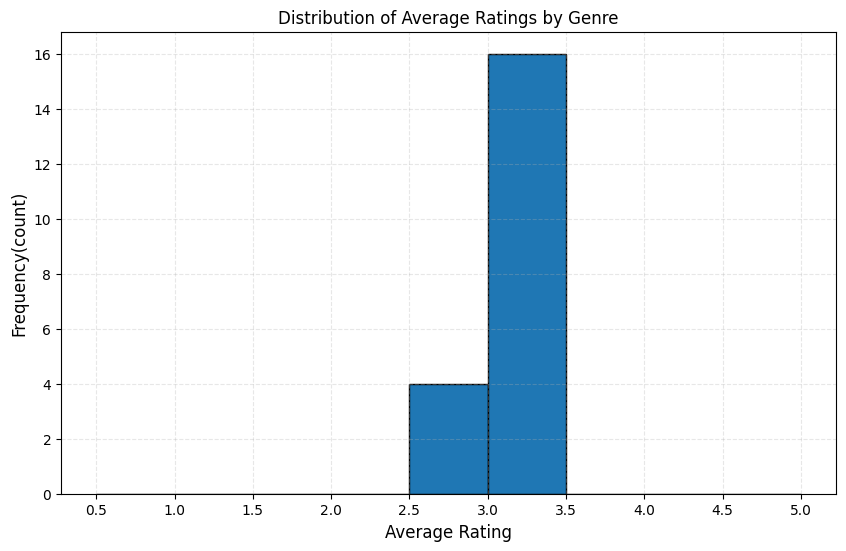

In [ ]:
plt.figure(figsize=(10, 6))
bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
plt.hist(genre_stats["genre_rating"], bins=bins, edgecolor="black")
plt.title("Distribution of Average Ratings by Genre")
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Frequency(count)", fontsize=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

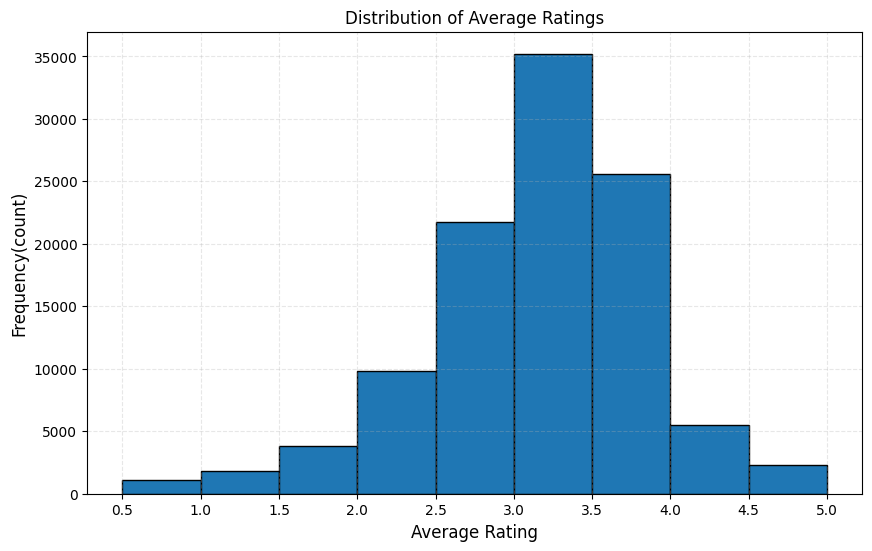

In [ ]:
plt.figure(figsize=(10, 6))
bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
plt.hist(movies_rating["avg_rating"], bins=bins, edgecolor="black")
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Frequency(count)", fontsize=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()